In [1]:
import pandas as pd
import numpy as np
import sklearn
from scipy.stats import skew, kurtosis
from scipy.stats import describe
from scipy.stats.mstats import gmean
import matplotlib.pyplot as plt
import scipy.linalg
import pprint as pprint
import time as time
from sklearn.decomposition import PCA

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,432.011322,167.863144,292.261475,155.167007,291.920013,135.526001,135.300003,217.699997,242.443298,314.279999,...,197.263107,64.592575,46.290192,151.118790,58.443172,377.068665,247.324020,48.182598,60.352272,66.789505
1,438.978333,171.749573,297.680664,156.510498,307.476654,136.608505,136.425507,221.000000,264.702484,316.200012,...,199.789520,64.328896,46.502743,159.029022,58.653572,372.440185,255.490829,49.446892,62.076630,67.673614
2,439.470337,171.511032,297.333191,158.100494,307.796661,137.738007,137.487503,216.539993,264.862305,315.649994,...,201.139511,64.172638,46.770744,165.211960,59.198696,377.000458,256.349976,50.203476,61.990410,65.915215
3,430.082642,167.863144,288.626679,154.652496,292.116669,132.539002,132.308502,207.710007,244.841064,313.549988,...,194.109894,64.514450,47.473091,157.448944,58.615318,378.822571,248.439911,48.600708,59.921181,64.019295
4,427.297852,166.292648,285.846893,152.601502,285.660004,130.403000,130.467499,206.160004,236.199127,314.799988,...,193.984528,64.455841,47.815025,157.380234,58.385788,376.571686,245.042847,48.381695,59.700851,64.981995


In [44]:
sigma= .15
r = 0.05
t = 25/252

# returns = np.random.normal(r, sigma, t)

# geomean= gmean(returns)

Geometric returns: E(P(t)) = 14841.32, SD(P(t)) = 7909.54
Arithmetic returns: E(P(t)) = 600.00, SD(P(t)) = 50.00
Brownian motion: E(P(t)) = 14841.32, SD(P(t)) = 502.49


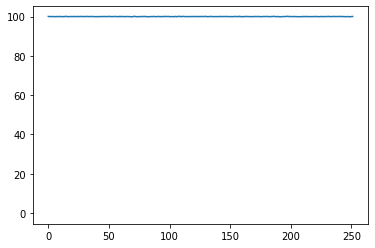

In [46]:
import numpy as np

# Define the parameters for the price model
P0 = 100  # initial price
r = 0.05  # expected rate of return
sigma = 0.05  # volatility
T = 100  # time horizon

# Define the time steps
N = 252  # number of trading days per year
dt = T / N  # length of time step

# Calculate the expected value and standard deviation of price at time t for each model

# def BrownianClassic(P0, stdev,N):
#     r = np.random.normal(0,stdev,N)
#     Pt = P0 +r
#     return Pt

# def GeometricReturn(P0,stdev,N):
#     r = np.random.normal(0,stdev,N)
#     Pt = P0 * np.exp(r)
#     return Pt

# def ArithmeticReturn(P0,stdev,N):
#     r = np.random.normal(0,stdev,N)
#     Pt = P0 + r
#     return Pt

def BrownianClassic(P0, stdev,N):
    r = np.random.normal(0,stdev,N)
    Pt = P0 +r
    return Pt

def GeometricReturn(P0, stdev, N):
    r = np.random.normal(0, stdev, N)
    Pt = P0 * np.exp(np.cumsum(r))
    return (Pt[-1]/P0 - 1)

def ArithmeticReturn(P0, stdev, N):
    r = np.random.normal(0, stdev, N)
    Pt = P0 * np.exp(r)
    return (Pt[-1] - P0) / P0


BrownianClassic = BrownianClassic(P0,sigma , N)
GeometricReturn = GeometricReturn(P0,sigma , N)
ArithmeticReturn = ArithmeticReturn(P0,sigma , N)

#graph the three simulations
plt.plot(BrownianClassic, label = 'Brownian Classic')
plt.plot(GeometricReturn, label = 'Geometric Return')
plt.plot(ArithmeticReturn, label = 'Arithmetic Return')

geometricExp = P0 * np.exp(r * T)
geometricStd = P0 * np.sqrt(np.exp(2 * r * T) * (np.exp(sigma**2 * T) - 1))
arithmeticExp = P0 * (1 + r * T)
arithmeticStd = P0 * sigma * np.sqrt(T)
brownianExp = P0 * np.exp(r * T)
brownianStd = P0 * np.sqrt((sigma**2 * T) * (1 + T))

# Print out the results
print("Geometric returns: E(P(t)) = {:.2f}, SD(P(t)) = {:.2f}".format(geometricExp, geometricStd))
print("Arithmetic returns: E(P(t)) = {:.2f}, SD(P(t)) = {:.2f}".format(arithmeticExp, arithmeticStd))
print("Brownian motion: E(P(t)) = {:.2f}, SD(P(t)) = {:.2f}".format(brownianExp, brownianStd))


In [47]:
#calculate Classical brownian motion returns given price

P0 = 100  # initial price
r = 0.05  # expected rate of return
sigma = 0.05  # volatility
T = 100  # time horizon

# Define the time steps
N = 100  # number of trading days per year
dt = T / N  # length of time step

# expected

def BrownianClassic(P0, stdev,N):
    r = np.random.normal(0,stdev,N)
    Pt = P0 +r
    return Pt

def GeometricReturn(P0, stdev, N):
    r = np.random.normal(0, stdev, N)
    Pt = P0 * np.exp(np.cumsum(r))
    return (Pt[-1]/P0 - 1)

def ArithmeticReturn(P0, stdev, N):
    r = np.random.normal(0, stdev, N)
    Pt = P0 * np.exp(r)
    return (Pt[-1] - P0) / P0





def classicalBrownianReturnSimulation(r, t, sigma):
    classical_brownian_return = r * t + sigma * np.random.normal(0,np.sqrt(t)) 
    return classical_brownian_return

#calculate Geometric brownian motion returns
def geometricBrownianReturnSimulation(r, t, sigma):
    geometric_return = np.random.normal((r - 0.5 * sigma**2) * t, sigma * np.sqrt(t))
    return geometric_return

def ArithmeticReturnsSimulation(r,t,sigma):
    arithmetic_return = np.random.normal(r * t, sigma * np.sqrt(t))
    return arithmetic_return

def expected_value(r,t):
    return r*t

def stdev(sigma,t):
    return sigma*np.sqrt(t)





ClassicalBrownianSimOutput = classicalBrownianReturnSimulation(BrownianClassic, t, sigma)
GeometricBrownianSimOutput = geometricBrownianReturnSimulation(GeometricReturn, t, sigma)
ArithmeticBrownianSimOutput = ArithmeticReturnsSimulation(ArithmeticReturn,t,sigma)

classical_brownian_expected = expected_value(ClassicalBrownianSimOutput, t)
classical_brownian_stddev = stdev(sigma, t)

arithmetic_expected = expected_value(ArithmeticBrownianSimOutput, t)
arithmetic_stddev = stdev(sigma, t)

geometric_expected = expected_value(GeometricBrownianSimOutput - 0.5 * sigma**2, t)
geometric_stddev = stdev(sigma, t)

# Print out the simulated returns and expected values/standard deviations
print('Classical Brownian return:', ClassicalBrownianSimOutput)
print('Expected value:', classical_brownian_expected)
print('Standard deviation:', classical_brownian_stddev)

print('Arithmetic return:', ArithmeticBrownianSimOutput)
print('Arithmetic Expected value:', arithmetic_expected)
print('Arithmetic Standard deviation:', arithmetic_stddev)

print('Geometric return:', GeometricBrownianSimOutput)
print('Expected value:', geometric_expected)
print('Standard deviation:', geometric_stddev)


TypeError: unsupported operand type(s) for *: 'function' and 't_gen'

In [2]:
DailyPricesAritmetic = pd.read_csv("DailyPrices.csv")
DailyPricesGeo = pd.read_csv("DailyPrices.csv")
DailyPricesClassicBrownian = pd.read_csv("DailyPrices.csv")
#Calculate Geometric Brownian Returns from Daily Prices


In [165]:
import pandas as pd
import numpy as np

# Read in the CSV file containing the stock prices
dailyPricesGeo = pd.read_csv('DailyPrices.csv')

#drop first column
dailyPricesGeo = dailyPricesGeo.drop(dailyPricesGeo.columns[0], axis=1)
dailyPricesGeo.head()

dailyLogReturns = np.log(dailyPricesGeo / dailyPricesGeo.shift(1))

# Calculate the cumulative log returns for each stock
cumulativeLogReturns = dailyLogReturns.cumsum()

# Calculate the geometric daily returns for each stock
geometricReturns = np.exp(cumulativeLogReturns) - 1

geometricReturns = geometricReturns.dropna()

# Print out the geometric daily returns for each stock
geometricReturns.head()


,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
1,0.016127,2.315237e-02,0.018542,0.008658,0.053291,0.007987,0.008319,0.015158,0.091812,0.006109,...,0.012807,-0.004082,0.004592,0.052344,0.003600,-0.012275,0.033021,0.026240,0.028572,0.013237
2,0.017266,2.173132e-02,0.017353,0.018905,0.054387,0.016322,0.016168,-0.005328,0.092471,0.004359,...,0.019651,-0.006501,0.010381,0.093259,0.012927,-0.000181,0.036494,0.041942,0.027143,-0.013090
3,-0.004464,2.220446e-16,-0.012437,-0.003316,0.000674,-0.022040,-0.022110,-0.045889,0.009890,-0.002323,...,-0.015985,-0.001210,0.025554,0.041889,0.002946,0.004651,0.004512,0.008678,-0.007143,-0.041477
4,-0.010911,-9.355810e-03,-0.021948,-0.016534,-0.021444,-0.037801,-0.035717,-0.053009,-0.025755,0.001655,...,-0.016620,-0.002117,0.032941,0.041434,-0.000982,-0.001318,-0.009223,0.004132,-0.010794,-0.027063
5,-0.021525,-2.700144e-02,-0.022661,-0.032027,-0.061923,-0.042151,-0.043588,-0.071750,-0.036140,-0.000382,...,-0.007284,0.004989,0.023757,0.044811,-0.002127,-0.001990,-0.000958,-0.033678,-0.013016,-0.040300


In [77]:
import pandas as pd
import numpy as np

# Read in the CSV file containing the stock prices
stockPrices = pd.read_csv('Daily.csv')

# Calculate the daily log returns for each stock
dailyLogReturns = np.log(stockPrices / stockPrices.shift(1))

# Calculate the cumulative log returns for each stock
cumulativeLogReturns = dailyLogReturns.cumsum()

# Calculate the geometric daily returns for each stock
geometricReturns = np.exp(cumulativeLogReturns) - 1

# Print out the geometric daily returns for each stock
print(geometricReturns)


FileNotFoundError: [Errno 2] No such file or directory: 'Daily.csv'

In [5]:
#calculate DailyReturns using Classical brownian motion formula 


# fix data set and drop dates 
DailyPrices = pd.read_csv("DailyPrices.csv")
DailyPrices = DailyPrices.drop(DailyPrices.columns[0], axis=1)

#calculate returns
def calculateReturns(dailyReturns, methodOfCalculation="Arithmetic"):
    if methodOfCalculation == "Arithmetic":
        dailyReturns = dailyReturns.pct_change()
        dailyReturns = dailyReturns.dropna()
        return dailyReturns
    elif methodOfCalculation == "Geometric":
        dailyGeoReturns = np.log(dailyReturns / dailyReturns.shift(1))
        geometricReturns = np.exp(dailyGeoReturns.cumsum()) - 1
        geometricReturns = geometricReturns.dropna()
        return geometricReturns
    else:
        print("Invalid method of calculation. Please choose either 'Arithmetic' or 'Geometric'.")


DailyReturnsAritmetic = calculateReturns(DailyPrices, methodOfCalculation= "Arithmetic")
DailyReturnsGeo = calculateReturns(DailyPrices, methodOfCalculation= "Geometric")


In [6]:
import statistics
#Remove the mean from the DailyReturnsArithmetic so that the mean(META)=0
DailyReturns_META = DailyReturnsAritmetic['META']
DailyReturns_META_Mean =DailyReturns_META.mean()
DailyReturns_META_MeansRemoved = DailyReturns_META - DailyReturns_META_Mean

DailyReturns_META_MeansRemoved= DailyReturns_META_MeansRemoved.dropna()

sigma = statistics.stdev(DailyReturns_META_MeansRemoved)
sigma



0.039882922468254534

In [7]:
from scipy.stats import norm
# Calculate VaR using normal distribution with parameters alpha = .05, std dev, mean,d
import numpy as np
from scipy.stats import norm

def calculate_Normal_VaR(DailyReturns_META_MeansRemoved, alpha):
    # Calculate the mean and standard deviation of the returns
    mu = np.mean(DailyReturns_META_MeansRemoved)
    sigma = np.std(DailyReturns_META_MeansRemoved)
    
    # Calculate the alpha-percentile VaR using the normal distribution
    VaR = -(norm.ppf(alpha) * sigma - mu)*100
    
    return VaR

VaR_5_percent = calculate_Normal_VaR(DailyReturns_META_MeansRemoved,.05)

VaR_5_percent


6.5469174848811225

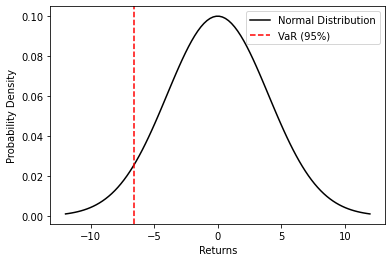

In [8]:

# create an x-axis array for the normal distribution plot

mu = DailyReturns_META_MeansRemoved.mean() *100
sigma = DailyReturns_META_MeansRemoved.std()*100

x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# plot the normal distribution
plt.plot(x, norm.pdf(x, mu, sigma), 'k-', label='Normal Distribution')

# plot the VaR on the normal distribution plot
plt.axvline(x=-VaR_5_percent, color='red', linestyle='--', label='VaR (95%)')

# add a legend and axis labels
plt.legend()
plt.xlabel('Returns')
plt.ylabel('Probability Density')

# show the plot
plt.show()



In [147]:
# #manually fix data so it can read most recent data first
# DailyReturns_META_MeansRemoved.to_csv("DailyReturns_META_MeansRemoved.csv")

In [150]:
# DailyReturns_META_MeansRemoved = pd.read_csv("DailyReturns_META_MeansRemoved.csv")


In [54]:
# def Cal_weight(lamda,n):
#     w=np.zeros(n)
#     total_w=0
#     for i in range(n):
#         tmp=(1-lamda)*pow(lamda,i-1)
#         w[i]=tmp
#         total_w+=tmp

#     w=w/total_w
#     return w

In [20]:


def calculate_Exponentially_Weighted_Variance_VaR(DailyReturns_META_MeansRemoved, alpha= .05, lam = .94):
    #First fix data so that the data frame gets inverted so that it can weight newest data point first
   


    #Calculate the exponentially weighted variance, Using adjust = true since it will weight the front
    Exponentially_Weighted_Variance = DailyReturns_META_MeansRemoved.ewm(alpha= 1-lam,adjust='False').var()

    Exponentially_Weighted_Variance = Exponentially_Weighted_Variance.dropna()
    sigma = np.sqrt(Exponentially_Weighted_Variance)

    mu = np.mean(DailyReturns_META_MeansRemoved)

    #calc VaR
    VaR = -(norm.ppf(alpha) * sigma - mu)*100

    return VaR


#return the vector of values
VaR_5_percent_EW = calculate_Exponentially_Weighted_Variance_VaR(DailyReturns_META_MeansRemoved,alpha = .05, lam = .94)*100

#Since VaR is min Loss on normal bad day, you calculate min of the vector 


VaR_5_percent_EW

min_loss = min(VaR_5_percent_EW)
min_loss

288.0074798798842

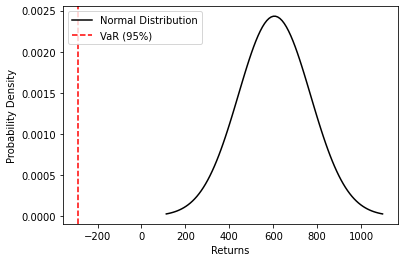

In [22]:
mu_EW = VaR_5_percent_EW.mean() 
sigma_EW = VaR_5_percent_EW.std()

x = np.linspace(mu_EW - 3*sigma_EW, mu_EW + 3*sigma_EW, 100)

# plot the normal distribution
plt.plot(x, norm.pdf(x, mu_EW, sigma_EW), 'k-', label='Normal Distribution')

# plot the VaR on the normal distribution plot
plt.axvline(x=-min_loss, color='red', linestyle='--', label='VaR (95%)')

# add a legend and axis labels
plt.legend()
plt.xlabel('Returns')
plt.ylabel('Probability Density')

# show the plot
plt.show()

In [19]:
#Carry over log likelihood t 
from scipy.stats import t


# def log_likelihood_t(params, residuals):
#     df = len(residuals) - 1
#     loglik = -np.sum(t.logpdf(residuals, df, mu, sigma))
#     return loglik

# mu_MLE_T_Dist = np.mean(DailyReturns_META_MeansRemoved)
# sigma_MLE_T_Dist = np.std(DailyReturns_META_MeansRemoved)

# params = t.fit(DailyReturns_META_MeansRemoved)
# Degree_freedom = params[0]
# loc = params[1]
# scale = params[2]

# loglik = log_likelihood_t(params,DailyReturns_META_MeansRemoved)
# print(loglik)


def calcVaR_MLE_T_Dist(DailyReturns_META_MeansRemoved,alpha =.05):
    DailyReturns_META_MeansRemoved = DailyReturns_META_MeansRemoved.dropna()
    params = t.fit(DailyReturns_META_MeansRemoved)
    Degree_freedom = params[0]
    loc = params[1]
    scale = params[2]

    sigma = np.std(DailyReturns_META_MeansRemoved)
    mu = np.mean(DailyReturns_META_MeansRemoved)

    VaR = -(t.ppf(alpha, Degree_freedom, loc, scale)* sigma - mu)*100
    return VaR

VaR_5_percent_MLE_T_Dist = calcVaR_MLE_T_Dist(DailyReturns_META_MeansRemoved,alpha =.05)

VaR_5_percent_MLE_T_Dist



0.22918101012447384

In [ ]:

# calculate the mean and standard deviation of the returns
mu = np.mean(DailyReturns_META_MeansRemoved)*100
sigma = np.std(DailyReturns_META_MeansRemoved)*100



# create an array of x-values for the normal distribution plot
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)

# plot the normal distribution
plt.plot(x, norm.pdf(x, mu, sigma), 'k-', label='Normal Distribution')

# plot the VaR on the normal distribution plot
plt.axvline(x=-VaR_5_percent_MLE_T_Dist, color='red', linestyle='--', label='VaR (95%)')

# add a legend and axis labels
plt.legend()
plt.xlabel('Returns')
plt.ylabel('Probability Density')

# show the plot
plt.show()


In [23]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA
import scipy.stats as stats
def calculate_ARIMA_VaR(DailyReturns_META_MeansRemoved,alpha = .05):
    DailyReturns_META_MeansRemoved = DailyReturns_META_MeansRemoved.dropna()
    model = ARIMA(DailyReturns_META_MeansRemoved, order=(1, 0, 0))
    model_fit = model.fit()
    residuals = model_fit.resid
    sigma = np.std(residuals)
    mu = np.mean(residuals)
    VaR = -(stats.norm.ppf(alpha)* sigma - mu)*100
    return VaR

VaR_5_percent_ARIMA = calculate_ARIMA_VaR(DailyReturns_META_MeansRemoved,alpha = .05)
VaR_5_percent_ARIMA

c:\Users\Moneybag Mike\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Moneybag Mike\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Moneybag Mike\AppData\Local\Programs\Python\Python37\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


6.546933924174427

In [24]:
def calculate_Historical_Simulation_VaR(DailyReturns_META_MeansRemoved,alpha= .05):
    sorted_return = np.sort(DailyReturns_META_MeansRemoved)
    
    index = int(np.floor(alpha*len(DailyReturns_META_MeansRemoved)))
    #Calculate the VaR
    VaR = -sorted_return[index]*100
    return VaR

VaR_5_percent_Historical_Simulation = calculate_Historical_Simulation_VaR(DailyReturns_META_MeansRemoved,alpha= .05)

VaR_5_percent_Historical_Simulation



5.590681367337082

In [25]:
# Problem 3

# import the data
portfolio = pd.read_csv("portfolio.csv")
portfolio = portfolio.set_index("Portfolio")
portfolio.head()

#


,Stock,Holding
Portfolio,,
A,AAPL,58
A,TSLA,10
A,JPM,64
A,HD,27
A,BAC,209


In [26]:
DailyPrices = pd.read_csv("DailyPrices.csv")
DailyPrices.head()

# #index by date
DailyPrices = DailyPrices.set_index("Date")
DailyPrices.head()

#convert to datetime
DailyPrices.index = pd.to_datetime(DailyPrices.index)
DailyPrices.head()

#reset index
DailyPrices = DailyPrices.reset_index()
DailyPrices.head()

,Date,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,2022-02-14,432.011322,167.863144,292.261475,155.167007,291.920013,135.526001,135.300003,217.699997,242.443298,...,197.263107,64.592575,46.290192,151.118790,58.443172,377.068665,247.324020,48.182598,60.352272,66.789505
1,2022-02-15,438.978333,171.749573,297.680664,156.510498,307.476654,136.608505,136.425507,221.000000,264.702484,...,199.789520,64.328896,46.502743,159.029022,58.653572,372.440185,255.490829,49.446892,62.076630,67.673614
2,2022-02-16,439.470337,171.511032,297.333191,158.100494,307.796661,137.738007,137.487503,216.539993,264.862305,...,201.139511,64.172638,46.770744,165.211960,59.198696,377.000458,256.349976,50.203476,61.990410,65.915215
3,2022-02-17,430.082642,167.863144,288.626679,154.652496,292.116669,132.539002,132.308502,207.710007,244.841064,...,194.109894,64.514450,47.473091,157.448944,58.615318,378.822571,248.439911,48.600708,59.921181,64.019295
4,2022-02-18,427.297852,166.292648,285.846893,152.601502,285.660004,130.403000,130.467499,206.160004,236.199127,...,193.984528,64.455841,47.815025,157.380234,58.385788,376.571686,245.042847,48.381695,59.700851,64.981995


In [27]:
#index by Portfolio
# if portfolio.empty:
#     print("The dataframe is empty!")
# else:
#     print(portfolio.head())

#get a list of assets in each portfolio and their holdings
portfolio_A = pd.DataFrame(portfolio[portfolio.index == 'A'])
portfolio_B = pd.DataFrame(portfolio[portfolio.index == 'B'])
portfolio_C = pd.DataFrame(portfolio[portfolio.index == 'C'])
portfolio_Total = portfolio

#reset index for portfolio_A
portfolio_A = portfolio_A.reset_index()
portfolio_A.head()

#set index by Portfolio




,Portfolio,Stock,Holding
0,A,AAPL,58
1,A,TSLA,10
2,A,JPM,64
3,A,HD,27
4,A,BAC,209


In [37]:
# df1=DailyPrices.copy()
# df2=df1.set_index(['Date']).stack()
# df3=df2.reset_index().sort_values(by=['level_1','Date']).rename(columns={0:'price'})
# df4=df3[['level_1','Date','price']].rename(columns={'level_1':'Stock'})
# df5_A=pd.merge(df4,portfolio_A,on=['Stock'],how='left') 

# portfolio_A_Adj = df5_A


# portfolio_A_Adj= pd.DataFrame(portfolio_A_Adj)

# portfolio_A_Adj

,Stock,Date,price,Holding
0,AAPL,2022-02-14,167.863144,58.0
1,AAPL,2022-02-15,171.749573,58.0
2,AAPL,2022-02-16,171.511032,58.0
3,AAPL,2022-02-17,167.863144,58.0
4,AAPL,2022-02-18,166.292648,58.0
...,...,...,...,...
24895,ZTS,2023-02-03,167.800003,NaN
24896,ZTS,2023-02-06,164.929993,NaN
24897,ZTS,2023-02-07,165.570007,NaN
24898,ZTS,2023-02-08,162.070007,NaN


In [28]:
def GetCorrespondingStockPrices(port_df, daily_price_df):
    stocks = port_df['Stock'].unique()
    stock_dfs = {}
    for stock in stocks:
        stock_df = daily_price_df[['Date', stock]].copy()
        stock_df = stock_df.rename(columns={stock: 'Price'})
        stock_df = stock_df.set_index('Date')
        stock_dfs[stock] = stock_df
    return pd.concat(stock_dfs, axis=1)


In [29]:
stockPricesA = pd.DataFrame(GetCorrespondingStockPrices(portfolio_A, DailyPrices))

stockPricesB = pd.DataFrame(GetCorrespondingStockPrices(portfolio_B,DailyPrices))
stockPricesC = pd.DataFrame(GetCorrespondingStockPrices(portfolio_C,DailyPrices))
stockPricesTotal = pd.DataFrame(GetCorrespondingStockPrices(portfolio_Total,DailyPrices))
# # # 
# def VaRCalcDataCleanup
# stockPricesA_Copy = stockPricesA.to_numpy()
# portfolio_A = merge_price_data(stockPrices, portfolio_A)
# portfolio_A.head()

#reset stockpriceA index to date
# stockPricesA.print()
# stockPricesA.head()
# stockPricesA_Copy



In [78]:
#Portfolio A 






# stock_price_port_A = GetCorrespondingStockPrices(portfolio_A,DailyPrices)
# stock_price_port_A.head()

# stock_price_port_B = GetCorrespondingStockPrices(portfolio_B,DailyPrices)


# stock_price_port_C = GetCorrespondingStockPrices(portfolio_C,DailyPrices)

def get_current_prices(stock_Prices_A, portfolio_A):
    last_row = stock_Prices_A.iloc[-1].transpose()
    current_prices = pd.DataFrame(last_row, columns=["Current price"])
    current_prices.index.name = "Stock"
    current_prices.reset_index(inplace=True)
    current_prices = pd.merge(current_prices, portfolio_A, on="Stock", how="left")
    return current_prices[["Stock", "Current price", "Holding"]]

# portfolio_A = get_current_prices(stock_price_port_A, portfolio_A)
# portfolio_A.head()
# portfolio_A = portfolio_A.reset_index()
# portfolio_A.head()

# print(portfolio_A_Adj)



KeyError: "['Date'] not in index"

In [399]:
def CalculateDollarValueofPortfolio(portfolio_A,prices):
    
    portfolio_A['Asset Value'] = (portfolio_A['Holding'] * prices[portfolio_A['Stock'].iloc[-1]])
    return portfolio_A

# stock_price_port_A = GetCorrespondingStockPrices(portfolio_A, DailyPrices)
# portfolio_A_value = CalculateDollarValueofPortfolio(portfolio_A, stock_price_port_A)
# #calculate the value of the portfolio

portfolio_A = CalculateDollarValueofPortfolio(portfolio_A, DailyPrices)

KeyError: 'Stock'

In [30]:
stock_Ret_Matrix_A= calculateReturns(stockPricesA, methodOfCalculation= "Arithmetic")




mean_returns_port_A = stock_Ret_Matrix_A.mean()
mean_returns_port_A.head()
stock_Ret_Matrix_A_Mean_Adj = stock_Ret_Matrix_A -mean_returns_port_A
#get what is indexed by
stock_Ret_Matrix_A_Mean_Adj

#drop date

stock_Ret_Matrix_B= calculateReturns(stockPricesB, methodOfCalculation= "Arithmetic")
stock_Ret_Matrix_B.head()



mean_returns_port_B = stock_Ret_Matrix_B.mean()
mean_returns_port_B
stock_Ret_Matrix_B_Mean_Adj = stock_Ret_Matrix_B -mean_returns_port_B
#get what is indexed by
stock_Ret_Matrix_B_Mean_Adj.head()

#drop date
stock_Ret_Matrix_C= calculateReturns(stockPricesC, methodOfCalculation= "Arithmetic")
stock_Ret_Matrix_C.head()



mean_returns_port_C = stock_Ret_Matrix_C.mean()
mean_returns_port_C.head()
stock_Ret_Matrix_C_Mean_Adj = stock_Ret_Matrix_C -mean_returns_port_C
#get what is indexed by
stock_Ret_Matrix_C_Mean_Adj.head()


# #drop date
stock_Ret_Matrix_Total= calculateReturns(stockPricesC, methodOfCalculation= "Arithmetic")
stock_Ret_Matrix_Total.head()



mean_returns_port_Total = stock_Ret_Matrix_Total.mean()
mean_returns_port_Total.head()
stock_Ret_Matrix_Total_Mean_Adj = stock_Ret_Matrix_Total -mean_returns_port_Total
#get what is indexed by
stock_Ret_Matrix_Total_Mean_Adj



,AMZN,GOOG,BRK-B,UNH,V,PFE,CSCO,CVX,ABBV,ABT,...,IBM,PLD,TGT,DE,MMM,F,LRCX,MO,LMT,TFC
,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price,...,Price,Price,Price,Price,Price,Price,Price,Price,Price,Price
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-15,0.010018,0.009403,0.006102,0.007807,0.010739,0.000085,0.020713,-0.008527,0.011895,0.010082,...,-0.002028,0.002097,-0.002111,0.015345,-0.003220,0.036004,0.063432,0.004456,-0.013301,0.029295
2022-02-16,0.011518,0.008869,-0.001747,0.003539,0.004122,-0.001923,-0.000152,-0.000909,0.007255,-0.002111,...,-0.006264,-0.008344,0.003289,-0.007729,-0.009848,-0.003378,-0.004243,0.005628,0.011219,-0.000665
2022-02-17,-0.020450,-0.036584,-0.006660,-0.020494,-0.018666,-0.015415,0.028235,-0.006345,-0.006583,-0.024756,...,-0.033005,-0.007448,-0.018085,-0.026191,-0.034661,-0.025603,-0.018647,0.014881,0.003808,-0.032656
2022-02-18,-0.011903,-0.012830,0.003979,-0.005646,-0.008815,-0.007281,0.026037,-0.002630,-0.006897,-0.031123,...,-0.005376,-0.004924,0.002160,-0.030547,-0.005842,0.029000,-0.018577,0.007067,-0.006967,-0.002953
2022-02-22,-0.014394,-0.007078,-0.002040,-0.011596,-0.006419,-0.020320,-0.015690,-0.008852,0.010210,0.006473,...,-0.003873,-0.001092,-0.039088,-0.042016,-0.004873,-0.041081,-0.018303,-0.009026,-0.001698,-0.001523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-03,-0.082956,-0.031820,-0.010749,0.002261,0.002216,-0.006029,-0.013774,0.001396,0.002072,-0.003789,...,0.003618,-0.021169,-0.023285,-0.001715,-0.022257,-0.075624,-0.022077,-0.001413,0.003108,-0.005230
2023-02-06,-0.010344,-0.015547,-0.000267,0.006555,-0.003265,-0.006523,-0.021581,-0.000086,-0.001653,-0.008995,...,-0.005965,-0.001197,-0.016271,0.009760,-0.007406,-0.006309,-0.015968,0.000930,0.020801,-0.009059


In [378]:
# #Sanity check to understand how weights are being generated, understand whether you need to invert since most recent data is at bottom

# lam = .75


# weight = np.zeros(len(stock_returns_matrix_port_A))

# for i in range(len(stock_returns_matrix_port_A)):
#     weight[len(stock_returns_matrix_port_A)-1-i]  = (1-lam)*lam**i
# weight = weight/sum(weight)


# weight = pd.DataFrame(weight)
# weight.tail()


,0
243,0.079102
244,0.105469
245,0.140625
246,0.187500
247,0.250000


In [31]:
def exponentially_weighted_covar_matrix(stock_returns_matrix_port_A,lam = .94):
    weight = np.zeros(len(stock_returns_matrix_port_A))
    for i in range(len(stock_returns_matrix_port_A)):
        weight[len(stock_returns_matrix_port_A)-1-i]  = (1-lam)*lam**i
    weight = weight/sum(weight)
    ret_means = stock_returns_matrix_port_A - stock_returns_matrix_port_A.mean()
    #print(ret_means.T.values.shape)
    #print(np.diag(weight).shape)
    #print(ret_means.values.shape)
    expo_w_cov = ret_means.T.values @ np.diag(weight) @ ret_means.values
    return expo_w_cov
    



In [32]:

#calculate the exponentially weighted covariance matrix
expo_w_cov_port_A = exponentially_weighted_covar_matrix(stock_Ret_Matrix_A_Mean_Adj,lam = .94)
# expo_w_cov_port_A = pd.DataFrame(expo_w_cov_port_A, columns = stock_Ret_Matrix_A_Mean_Adj.columns, index = stock_Ret_Matrix_A_Mean_Adj.columns)
# expo_w_cov_port_A

#calculate the exponentially weighted covariance matrix
expo_w_cov_port_B = exponentially_weighted_covar_matrix(stock_Ret_Matrix_B_Mean_Adj, lam = .94)
# expo_w_cov_port_B = pd.DataFrame(expo_w_cov_port_B, columns = stock_Ret_Matrix_B_Mean_Adj.columns, index = stock_Ret_Matrix_B_Mean_Adj.columns)
# expo_w_cov_port_B

#calculate the exponentially weighted covariance matrix
expo_w_cov_port_C = exponentially_weighted_covar_matrix(stock_Ret_Matrix_C_Mean_Adj, lam = .94)
# expo_w_cov_port_C = pd.DataFrame(expo_w_cov_port_C, columns = stock_Ret_Matrix_C_Mean_Adj.columns, index = stock_Ret_Matrix_C.columns)
# expo_w_cov_port_C

#calculate the exponentially weighted covariance matrix
expo_w_cov_port_Total = exponentially_weighted_covar_matrix(stock_Ret_Matrix_Total_Mean_Adj, lam = .94)
# expo_w_cov_port_Total = pd.DataFrame(expo_w_cov_port_Total, columns = stock_Ret_Matrix_Total_Mean_Adj.columns, index = stock_Ret_Matrix_Total_Mean_Adj.columns)




In [33]:
#fix index of portfolio

# portfolio_A = portfolio_A.reset_index()
portfolio_B = portfolio_B.reset_index()
portfolio_C = portfolio_C.reset_index()
portfolio_Total = portfolio_Total.reset_index()

In [35]:
import numpy as np
import pandas as pd
from scipy.stats import norm




def calculate_var(portfolio_df, prices_df, return_matrix, lam=0.94, alpha=0.05):
    holdings = portfolio_df['Holding'].values

    # get list of stocks and holdings for each portfolio
    portfolios = portfolio_df['Portfolio'].unique()
    portfolio_holdings = {}
    portfolio_returns = {}

    for portfolio_name in portfolios:
        stocks = list(portfolio_df.loc[portfolio_df['Portfolio'] == portfolio_name, 'Stock'])
        portfolio_holdings[portfolio_name] = holdings[portfolio_df['Portfolio'] == portfolio_name]

        portfolio_prices = prices_df[stocks].values
        portfolio_returns[portfolio_name] = np.diff(np.log(portfolio_prices), axis=0)

    cov_matrices = {}

    for portfolio_name, returns in portfolio_returns.items():
        cov_matrix = exponentially_weighted_covar_matrix(return_matrix, lam)
        cov_matrices[portfolio_name] = cov_matrix

    for portfolio_name, returns in portfolio_returns.items():
        portfolio_values = prices_df[list(portfolio_df.loc[portfolio_df['Portfolio'] == portfolio_name, 'Stock'])].values[-1, :] * portfolio_holdings[portfolio_name]

        # Calculate portfolio expected return
        portfolio_expected_return = np.sum(portfolio_returns[portfolio_name] * portfolio_holdings[portfolio_name])

        # Calculate the standard deviation of the portfolio returns (sigma)
        sigma = np.sqrt(np.diag(cov_matrix))

        # Calculate VaR$
        portfolio_var = -norm.ppf(alpha) * np.sqrt(np.dot(portfolio_values, np.dot(cov_matrices[portfolio_name], portfolio_values)))
        print(f"Portfolio {portfolio_name} VaR$: ${portfolio_var:.2f}")

        # Calculate VaRret
        var_ret = portfolio_expected_return * norm.ppf(alpha)
        print(f"Portfolio {portfolio_name} VaRret: {var_ret:.2f}")




    
    
VaR_port_A_5 = calculate_var(portfolio_A, stockPricesA, stock_Ret_Matrix_A_Mean_Adj, lam = .94, alpha= .05 ) 
VaR_port_B_5 = calculate_var(portfolio_B, stockPricesB, stock_Ret_Matrix_B_Mean_Adj, lam = .94, alpha= .05 ) 
VaR_port_C_5 = calculate_var(portfolio_C, stockPricesC, stock_Ret_Matrix_C_Mean_Adj, lam = .94, alpha= .05 )
# VaR_port_Total_5 = calculate_var(portfolio_Total, stockPricesTotal, stock_Ret_Matrix_Total_Mean_Adj, lam = .94, conf_level= .05 )


# import numpy as np
# import pandas as pd
# from scipy.stats import norm

# def portfolio_var(portfolio_name, portfolio,port_return_matrix, prices,alpha= .05, lam=0.97):
#     stocks = list(portfolio.loc[portfolio['Portfolio'] == portfolio_name, 'Stock'])
#     holdings = portfolio.loc[portfolio['Portfolio'] == portfolio_name, 'Holding']
#     portfolio_prices = prices[stocks].values
#     portfolio_returns = port_return_matrix
#     cov_matrix = exponentially_weighted_covar_matrix(portfolio_returns, lam)
#     holdings = holdings.reset_index(drop=True)
#     portfolio_values = prices[stocks].values[-1, :] * holdings.values
    
#     portfolio_var = norm.ppf(alpha) * np.sqrt(np.dot(portfolio_values, np.dot(cov_matrix, portfolio_values)))

#     print(f"Portfolio {portfolio_name} VaR: ${portfolio_var:.2f}")
#     return portfolio_var

# def total_var(portfolio, prices, alpha = .05,lam=0.97):
#     portfolio_returns = []
#     for portfolio_name in portfolio['Portfolio'].unique():
#         stocks = list(portfolio.loc[portfolio['Portfolio'] == portfolio_name, 'Stock'])
#         portfolio_prices = prices[stocks].values
#         portfolio_returns.append(np.diff(np.log(portfolio_prices), axis=0))
#     total_returns = np.concatenate(portfolio_returns, axis=1)
#     total_cov_matrix = exponentially_weighted_covar_matrix(total_returns, lam)
#     total_portfolio_value = 0
#     total_var = 0
#     for i, portfolio_name in enumerate(portfolio['Portfolio'].unique()):
#         stocks = list(portfolio.loc[portfolio['Portfolio'] == portfolio_name, 'Stock'])
#         holdings = portfolio.loc[portfolio['Portfolio'] == portfolio_name, 'Holding']
#         portfolio_values = prices[stocks].values[-1, :] * holdings.values
#         portfolio_var = norm.ppf(alpha) * np.sqrt(np.dot(portfolio_values, np.dot(total_cov_matrix[:, i*len(stocks):(i+1)*len(stocks)], portfolio_values)))

#         total_portfolio_value += np.sum(portfolio_values)
#         total_var += portfolio_var

#         print(f"Portfolio {portfolio_name} VaR: ${portfolio_var:.2f}")

#     print(f"Total VaR: ${total_var:.2f}")
#     return total_var


# VaR_port_A_5 = portfolio_var('Portfolio A',portfolio_A,stock_Ret_Matrix_A_Mean_Adj,stockPricesA, alpha = .05, lam = .94 )


Portfolio A VaR$: $5670.20
Portfolio A VaRret: 205.54
Portfolio B VaR$: $4494.60
Portfolio B VaRret: 14.90
Portfolio C VaR$: $3786.59
Portfolio C VaRret: 413.43


In [38]:
import numpy as np
from scipy.stats import norm

def simulate_portfolio_returns(holdings, return_matrix, num_simulations):
    portfolio_mean = np.mean(np.dot(return_matrix, holdings))
    portfolio_std = np.std(np.dot(return_matrix, holdings))
    portfolio_values = np.zeros(num_simulations)
    for i in range(num_simulations):
        portfolio_returns = np.random.normal(portfolio_mean, portfolio_std, len(holdings))
        portfolio_values[i] = np.dot(portfolio_returns, holdings)
    return portfolio_values

def portfolio_var(portfolio_name, portfolio, return_matrix, prices, alpha=0.05, lam=0.94, num_simulations=100000):
    holdings = portfolio['Holding'].values
    stocks = list(portfolio['Stock'])
    portfolio_values = prices[stocks].values[-1, :] * holdings
    cov_matrix = exponentially_weighted_covar_matrix(return_matrix, lam)

    portfolio_returns = np.dot(return_matrix, holdings)
    portfolio_mean = np.mean(portfolio_returns)
    portfolio_std = np.std(portfolio_returns)

    portfolio_values_mc = -simulate_portfolio_returns(holdings, return_matrix, num_simulations)
    portfolio_var_mc = -np.percentile(portfolio_values_mc, 100 * alpha)

    print(f"Portfolio {portfolio_name} VaR ($): {portfolio_var_mc:.2f}")
    print(f"Portfolio {portfolio_name} VaR (return): {portfolio_mean - portfolio_var_mc / portfolio_values.sum():.4f}")


portfolio_var('Portfolio A', portfolio_A, stock_Ret_Matrix_A_Mean_Adj, stockPricesA, alpha=0.05, lam=0.94)
portfolio_var('Portfolio B', portfolio_B, stock_Ret_Matrix_B_Mean_Adj, stockPricesB, alpha=0.05, lam=0.94)
portfolio_var('Portfolio C', portfolio_C, stock_Ret_Matrix_C_Mean_Adj, stockPricesC, alpha=0.05, lam=0.94)
portfolio_var('Portfolio Total', portfolio_Total, stock_Ret_Matrix_Total_Mean_Adj, stockPricesTotal, alpha=0.05, lam=0.94)

Portfolio Portfolio A VaR ($): 44929.54
Portfolio Portfolio A VaR (return): -0.1498
Portfolio Portfolio B VaR ($): 21550.09
Portfolio Portfolio B VaR (return): -0.0732
Portfolio Portfolio C VaR ($): 39058.04
Portfolio Portfolio C VaR (return): -0.1446


ValueError: shapes (248,32) and (99,) not aligned: 32 (dim 1) != 99 (dim 0)